# Regularization

$$\textrm{argmin}_\mathbf{w} L_S(h_\mathbf{w})=\textrm{argmin}_\mathbf{w} \frac{1}{m}\sum_{i=1}^m(\mathbf{w}'\cdot \mathbf{x}_i' - y_i)^2 - \lambda R(\mathbf{w})$$


|Regularization|    $R(\mathbf{w})$ |      Definition     |  
|:-------------|------------------|:-------------------:|
|    Ridge     | ${||\mathbf{w}||}_2^2 $ |  $\sum_{i}w_i^2$ | 
|    Lasso     | ${||\mathbf{w}||}_1 $ | $\sum_{i}|w_i|$|

https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

https://scikit-learn.org/stable/modules/linear_model.html#lasso

### Question
> 1. On the dataset dataA of Lab2, train a simple polynomial regressor of degree d=10 with a simple linear regression, a ridge regression and a lasso regression
> 2. Compare the solutions obtained

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def polynom_sample(x, coefs, sigma=5):
    """Une fonction pour associer un vecteur y e un vecteur x avec 
    une relation polynomiale de coefficient coefs et un bruit gaussien 
    de variance sigma"""
    d = len(coefs) # le degre du polynome
    y = sigma*np.random.randn(*x.shape) # initialise avec bruit gaussien 
    for i in range(d): # accumule le calcul du polynome
        y = y + coefs[i]*( x**i) 
    return y

def sample_x(N, a, b):
    """
    Generate according to a gaussian mixture model
    """
    rng = np.random.default_rng(seed=42)
    k = 2
    param = {'mean':[a+(b-a)/4, a+(b-a)*3/4], 'std': [(b-a)/8, (b-a)/8],
             'mix':[1/3, 2/3]}
    print(param)
    data = []
    for i in range(N):
        # first sample de which gaussian
        q = rng.choice(k, p=param['mix'])
        # then sample from the domain according to the choosen gaussian 
        data.append(rng.normal(loc=param['mean'][q], scale=param['std'][q]))
    return np.array(data)

def data_sample2(N,name):
    """genere un ensemble de donnees de taille N tirees d'un polynome particulier - tirage non uniforme"""
    a = -5 # borne inf
    b = 5 # borne sup
    coefs = [-5.200936516600877, 3.28592655]
    #x = (b-a)*np.random.random_sample(N) + a # N points tires uniformement de l'intervalle [a,b]
    x = sample_x(N+1, a, b) # N points tires dans l'intervalle [a,b]
    y = polynom_sample(x, coefs, sigma=6)
    df = pd.DataFrame({"x":x,"y":y})
    df.to_csv(name+'.csv', index=False)

data_sample2(100,"data_train")
data_sample2(500,"data_test")

In [2]:
set_=""

In [3]:
train = pd.read_csv("./data"+set_+"_train.csv")
X_train = np.vstack(train.x) # column matrix instead of line vector
y_train = train.y

test = pd.read_csv("./data"+set_+"_test.csv")
X_test = np.vstack(test.x) # column matrix instead of line vector
y_test = test.y

emp_error:  0.2638068196482446
gen_error 13.661618169939125
[ 0.000e+00  5.551e+00 -2.898e+00 -8.660e-01  6.960e-01  1.040e-01
 -6.100e-02 -4.000e-03  2.000e-03  0.000e+00 -0.000e+00]


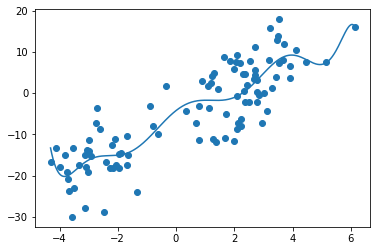

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

#simple polynomial regressor of degree d=10
d = 10
l = LinearRegression()
poly_reg_lin = make_pipeline(PolynomialFeatures(d),l)

poly_reg_lin.fit(X_train, y_train)
xsupport = np.vstack(np.linspace(min(train.x), max(train.x), 500))
yfit = poly_reg_lin.predict(xsupport)

plt.scatter(X_train, y_train)
plt.plot(xsupport, yfit)

yhat_train = poly_reg_lin.predict(X_train)
emp_error = 1-explained_variance_score(y_train, yhat_train)
yhat_test = poly_reg_lin.predict(X_test)
gen_error = 1-explained_variance_score(y_test, yhat_test)
print("emp_error: ",emp_error)
print("gen_error",gen_error)
print(np.round(l.coef_,3))
poly_reg_lin_coef=l.coef_

emp_error:  0.2930203252994269
gen_error 0.34857838026054466
[ 0.     0.432 -0.106  0.658 -0.025 -0.033  0.004  0.    -0.     0.
  0.   ]


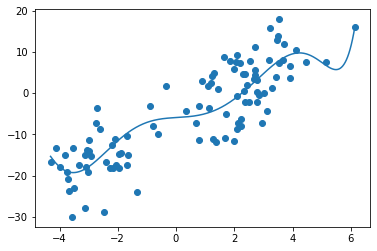

In [5]:
from sklearn.linear_model import Ridge

#ridge regression
r = Ridge(alpha=250)
ridge = make_pipeline(PolynomialFeatures(d),r)

ridge.fit(X_train, y_train)
yfit = ridge.predict(xsupport)

plt.scatter(X_train, y_train)
plt.plot(xsupport, yfit)

yhat_train = ridge.predict(X_train)
emp_error = 1-explained_variance_score(y_train, yhat_train)
yhat_test = ridge.predict(X_test)
gen_error = 1-explained_variance_score(y_test, yhat_test)
print("emp_error: ",emp_error)
print("gen_error",gen_error)
print(np.round(r.coef_,3))
ridge_coef=r.coef_

emp_error:  0.2812769486932487
gen_error 0.2751311650091133
[ 0.00e+00  3.57e+00  8.60e-02 -8.00e-03  1.00e-03 -0.00e+00  0.00e+00
 -0.00e+00  0.00e+00 -0.00e+00  0.00e+00]


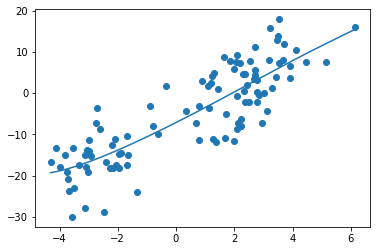

In [6]:
from sklearn.linear_model import Lasso

#lasso regression
la = Lasso(tol=0.5, alpha=0.1)
lasso = make_pipeline(PolynomialFeatures(d),la)

lasso.fit(X_train, y_train)
yfit = lasso.predict(xsupport)

plt.scatter(X_train, y_train)
plt.plot(xsupport, yfit)

yhat_train = lasso.predict(X_train)
emp_error = 1-explained_variance_score(y_train, yhat_train)
yhat_test = lasso.predict(X_test)
gen_error = 1-explained_variance_score(y_test, yhat_test)
print("emp_error: ",emp_error)
print("gen_error",gen_error)
print(np.round(la.coef_,3))
lasso_coef=la.coef_

In [7]:
gen_errors = [] # generalization errors
emp_errors = [] # training errors
k_vals = list(range(1,400,2))

for a in k_vals:
    # Train
    r = Ridge(alpha=a)
    ridge = make_pipeline(PolynomialFeatures(d),r)
    ridge.fit(X_train, y_train)
    # Predict
    yhat_train = ridge.predict(X_train)
    emp_errors.append(1-explained_variance_score(y_train, yhat_train))#mean_squared_error(y, yhat_train))
    yhat_test = ridge.predict(X_test)
    gen_errors.append(1-explained_variance_score(y_test, yhat_test))#mean_squared_error(y_test, yhat_test))

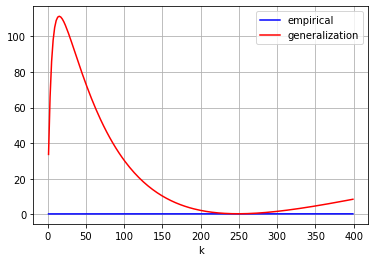

In [8]:
k_errors = pd.DataFrame({"k":k_vals,"empirical":emp_errors,"generalization":gen_errors})
ax=k_errors.plot(kind="line",x="k",y="empirical",color="b")
k_errors.plot(kind="line",x="k",y="generalization", color="r",ax=ax,grid=True)

In [9]:
gen_errors = [] # generalization errors
emp_errors = [] # training errors
k_vals = list(range(1,400,2))

for a in k_vals:
    # Train
    la = Lasso(tol=0.5,alpha=a)
    lasso = make_pipeline(PolynomialFeatures(d),la)
    lasso.fit(X_train, y_train)
    # Predict
    yhat_train = lasso.predict(X_train)
    emp_errors.append(1-explained_variance_score(y_train, yhat_train))#mean_squared_error(y, yhat_train))
    yhat_test = lasso.predict(X_test)
    gen_errors.append(1-explained_variance_score(y_test, yhat_test))#mean_squared_error(y_test, yhat_test))

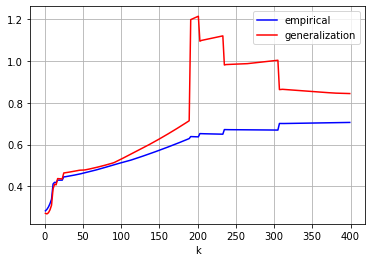

In [10]:
k_errors = pd.DataFrame({"k":k_vals,"empirical":emp_errors,"generalization":gen_errors})
ax=k_errors.plot(kind="line",x="k",y="empirical",color="b")
k_errors.plot(kind="line",x="k",y="generalization", color="r",ax=ax,grid=True)

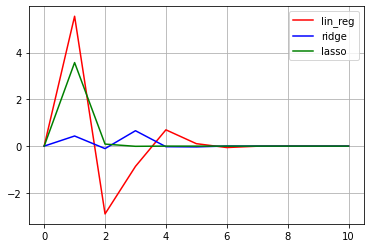

In [11]:
plt.plot(poly_reg_lin_coef, color="red", label="lin_reg")
plt.plot(ridge_coef, color="blue", label="ridge")
plt.plot(lasso_coef, color="green", label="lasso")
plt.legend()
plt.grid()